**Problem Statement** 

This dataset could be used to train a ANN regression model that can predict the price of a car based on its age, mileage, engine specifications, paint color, transmission type, number of doors, and weight.

The “TARGET variable in this dataset is the “PRICE” variable on which will be predicted by the ANN regression.

The rest of the variables are used for training the models.

total Rows(1044)

total columns(10)

In [3]:
#import libraries
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
#read the file
df = pd.read_csv('/content/CarPricesDataset.csv')

In [5]:

#records and columns
df.shape

(1044, 10)

In [6]:
#snapshot of the data
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986,Diesel,90,1,0,2000,3,1165
1,13750,23.0,72937,Diesel,90,1,0,2000,3,1165
2,13950,24.0,41711,Diesel,90,1,0,2000,3,1165
3,14950,26.0,48000,Diesel,90,0,0,2000,3,1165
4,13750,30.0,38500,Diesel,90,0,0,2000,3,1170


In [7]:
df.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC             int64
Doors          int64
Weight         int64
dtype: object

In [8]:
df['CC'] = df['CC'].astype(float)
df['Weight'] =df['Weight'].astype(float)

In [9]:
df.tail()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1039,10950,59.0,22705,Petrol,110,1,0,1600.0,5,1075.0
1040,9500,63.0,22178,Petrol,86,1,0,1300.0,3,1015.0
1041,10900,62.0,17345,Petrol,110,1,0,1600.0,3,1050.0
1042,10950,67.0,15535,Petrol,86,1,1,1300.0,4,1030.0
1043,9450,66.0,15110,Petrol,86,0,0,1300.0,5,1035.0


In [10]:
df.dtypes

Price          int64
Age          float64
KM             int64
FuelType      object
HP             int64
MetColor       int64
Automatic      int64
CC           float64
Doors          int64
Weight       float64
dtype: object

In [11]:
# checking columns
df.columns

Index(['Price', 'Age', 'KM', 'FuelType', 'HP', 'MetColor', 'Automatic', 'CC',
       'Doors', 'Weight'],
      dtype='object')

In [12]:
df.value_counts()

Price  Age   KM      FuelType  HP   MetColor  Automatic  CC      Doors  Weight
24950  8.0   13253   Diesel    116  1         0          2000.0  5      1320.0    2
4350   44.0  158320  Diesel    69   0         0          1800.0  5      1110.0    1
11950  40.0  179860  Diesel    90   1         0          2000.0  5      1205.0    1
       41.0  51732   Petrol    97   1         0          1400.0  3      1025.0    1
             45287   Petrol    110  1         0          1600.0  5      1075.0    1
                                                                                 ..
9940   53.0  60558   Petrol    110  1         0          1600.0  4      1105.0    1
9950   37.0  44757   Petrol    97   0         0          1400.0  3      1025.0    1
       42.0  27141   Petrol    97   1         0          1400.0  5      1060.0    1
             105699  Petrol    97   1         0          1400.0  3      1025.0    1
32500  4.0   1       Diesel    116  0         0          2000.0  5      1480.0   

In [13]:
#to understand the datatype for each of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      1044 non-null   int64  
 1   Age        1042 non-null   float64
 2   KM         1044 non-null   int64  
 3   FuelType   1041 non-null   object 
 4   HP         1044 non-null   int64  
 5   MetColor   1044 non-null   int64  
 6   Automatic  1044 non-null   int64  
 7   CC         1044 non-null   float64
 8   Doors      1044 non-null   int64  
 9   Weight     1044 non-null   float64
dtypes: float64(3), int64(6), object(1)
memory usage: 81.7+ KB


In [14]:
print(df.nunique())


Price        198
Age           65
KM           928
FuelType       3
HP            11
MetColor       2
Automatic      2
CC            12
Doors          4
Weight        56
dtype: int64


In [15]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight
count,1044.000000,1042.000000,1044.000000,1044.000000,1044.00000,1044.000000,1044.000000,1044.000000,1044.000000
mean,11784.138889,48.687140,61365.251916,102.146552,0.68295,0.049808,1572.203065,4.073755,1077.860153
std,3692.513760,16.604399,35237.832731,15.422791,0.46555,0.217653,184.208246,0.953030,57.435491
min,4350.000000,1.000000,1.000000,69.000000,0.00000,0.000000,1300.000000,2.000000,1000.000000
25%,9450.000000,39.000000,36635.000000,97.000000,0.00000,0.000000,1400.000000,3.000000,1043.750000
50%,10750.000000,53.500000,57061.500000,110.000000,1.00000,0.000000,1600.000000,4.000000,1070.000000
75%,12950.000000,62.000000,78170.000000,110.000000,1.00000,0.000000,1600.000000,5.000000,1100.000000
max,32500.000000,68.000000,243000.000000,192.000000,1.00000,1.000000,2000.000000,5.000000,1615.000000


In [16]:
# one hot encoder
FuelType_dummies = pd.get_dummies(prefix='Fue',data=df,columns=['FuelType'])

In [17]:
label_df = FuelType_dummies.head()
label_df

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_CNG,Fue_Diesel,Fue_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [18]:
# Create a copy of the original dataset
cars_scaled = df.copy()

# Select the numeric columns to scale
numeric_cols = [col for col in df.select_dtypes(include=['float','int']).columns
                if col not in [ 'MetColor', 'Automatic','FuelType']]

# Define the min-max scaling function
def min_max_scaler(col):
    return (col - col.min()) / (col.max() - col.min())

# Apply the min-max scaling function to the numeric columns
cars_scaled[numeric_cols] = cars_scaled[numeric_cols].apply(min_max_scaler)
# Print the scaled dataset
cars_scaled.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0.325044,0.328358,0.193355,Diesel,0.170732,1,0,1.0,0.333333,0.268293
1,0.333925,0.328358,0.300149,Diesel,0.170732,1,0,1.0,0.333333,0.268293
2,0.341030,0.343284,0.171647,Diesel,0.170732,1,0,1.0,0.333333,0.268293
3,0.376554,0.373134,0.197528,Diesel,0.170732,0,0,1.0,0.333333,0.268293
4,0.333925,0.432836,0.158433,Diesel,0.170732,0,0,1.0,0.333333,0.276423


In [19]:
#one hot encoder
FuelType_dummies = pd.get_dummies(prefix='Fue',data=df,columns=['FuelType'])
df_train = FuelType_dummies
df_train.head(5)

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_CNG,Fue_Diesel,Fue_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


In [20]:
df['CC']=df['CC'].fillna(0)
df['Age']=df['Age'].fillna(0)
df['Weight']=df['Weight'].fillna(0)
df['FuelType']=df['FuelType'].fillna(0)

In [21]:
df.isna().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

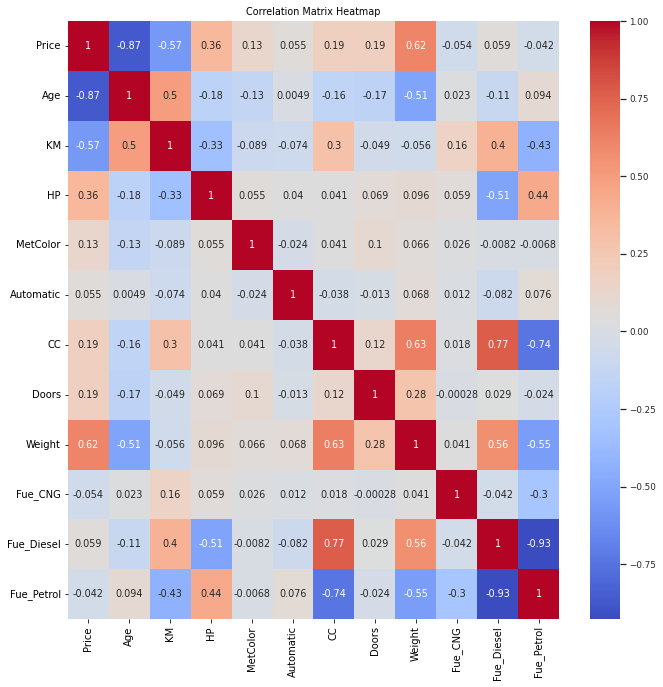

In [22]:
corr_matrix = df_train.corr()

# Set the figure size
plt.subplots(figsize=(11, 11))

# Create a heatmap of the correlation matrix
sns.set(font_scale=0.8)
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [23]:
df_train.head()

,Price,Age,KM,HP,MetColor,Automatic,CC,Doors,Weight,Fue_CNG,Fue_Diesel,Fue_Petrol
0,13500,23.0,46986,90,1,0,2000.0,3,1165.0,0,1,0
1,13750,23.0,72937,90,1,0,2000.0,3,1165.0,0,1,0
2,13950,24.0,41711,90,1,0,2000.0,3,1165.0,0,1,0
3,14950,26.0,48000,90,0,0,2000.0,3,1165.0,0,1,0
4,13750,30.0,38500,90,0,0,2000.0,3,1170.0,0,1,0


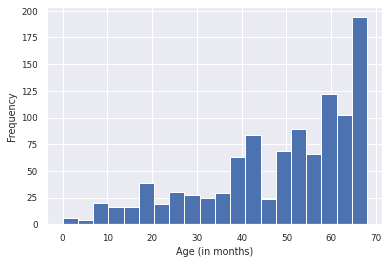

In [24]:
# Histogram of Age:
import matplotlib.pyplot as plt
plt.hist(df['Age'], bins=20)
plt.xlabel('Age (in months)')
plt.ylabel('Frequency')
plt.show()

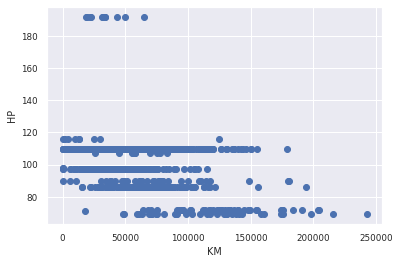

In [25]:
# Scatter plot of KM vs. HP
import matplotlib.pyplot as plt
plt.scatter(df['KM'], df['HP'])
plt.xlabel('KM')
plt.ylabel('HP')
plt.show()


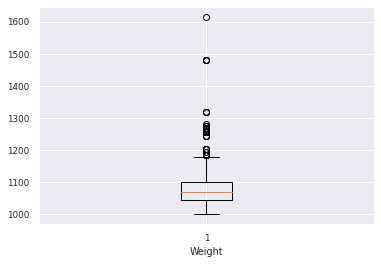

In [26]:
# Box plot of Weight:
import matplotlib.pyplot as plt
plt.boxplot(df['Weight'])
plt.xlabel('Weight')
plt.show()

In [27]:
# Train test split 

def train_test_split(X, y, test_size=0.2, random_state=None):

    # Check if input arrays have the same length
    assert len(X) == len(y)

    # Shuffle the data
    if random_state is not None:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(X))
    X_shuffled = X.iloc[shuffled_indices]
    y_shuffled = y.iloc[shuffled_indices]
    
    # Calculate the number of instances in the test subset
    n_test = int(len(X) * test_size)
    
    # Split the data
    X_train = X_shuffled[:-n_test]
    X_test = X_shuffled[-n_test:]
    y_train = y_shuffled[:-n_test]
    y_test = y_shuffled[-n_test:]
    
    return X_train, X_test, y_train, y_test

In [28]:
# Create a new DataFrame 'X' with the target variable removed
X = df_train.drop(columns=['Price'], axis=1)

# Create a Series 'y' that contains the target variable values
y = df_train['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(836, 11)
(208, 11)
(836,)
(208,)


In [30]:
import numpy as np
np.random.seed(42)

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        
        # Initialize weights and biases
        self.W1 = np.random.randn(self.input_size, self.hidden_size)
        self.b1 = np.zeros((1, self.hidden_size))
        self.W2 = np.random.randn(self.hidden_size, self.output_size)
        self.b2 = np.zeros((1, self.output_size))
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def forward(self, X):
        # Calculate hidden layer activation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)
        
        # Calculate output layer activation
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.z2
        
        return self.a2
    
    def backward(self, X, y, output):
        # Calculate error at output layer
        self.output_error = output - y
        self.output_delta = self.output_error
        
        # Calculate error at hidden layer
        self.hidden_error = np.dot(self.output_delta, self.W2.T)
        self.hidden_delta = self.hidden_error * self.sigmoid_derivative(self.a1)
        
        # Update weights and biases
        self.W2 -= self.learning_rate * np.dot(self.a1.T, self.output_delta)
        self.b2 -= self.learning_rate * np.sum(self.output_delta, axis=0, keepdims=True)
        self.W1 -= self.learning_rate * np.dot(X.T, self.hidden_delta)
        self.b1 -= self.learning_rate * np.sum(self.hidden_delta, axis=0)
    
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output)
            
    def predict(self, X):
        return self.forward(X)
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        mse = np.mean((predictions - y)**2)
        return mse

# Define training and testing sets
train_set = np.random.randn(100, 5)
test_set = np.random.randn(100, 1)


# Create a neural network with 5 inputs, 10 hidden units, and 1 output
nn = NeuralNetwork(input_size=5, hidden_size=10, output_size=1)

# Train the neural network on the training set for 10 epochs
nn.train(train_set, test_set, epochs=10)

# Evaluate the mean squared error of the trained model on the testing set
mse = nn.evaluate(train_set, test_set)
print("Testing mean squared",mse)

Testing mean squared 0.8204625222820663
